<a href="https://colab.research.google.com/github/ebi19912/AI/blob/main/Autoencoder_chest_xray_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d khanfashee/nih-chest-x-ray-14-224x224-resized

!unzip nih-chest-x-ray-14-224x224-resized.zip

Streaming output truncated to the last 5000 lines.
  inflating: images-224/images-224/00028897_017.png  
  inflating: images-224/images-224/00028897_018.png  
  inflating: images-224/images-224/00028897_019.png  
  inflating: images-224/images-224/00028897_020.png  
  inflating: images-224/images-224/00028898_000.png  
  inflating: images-224/images-224/00028899_000.png  
  inflating: images-224/images-224/00028899_001.png  
  inflating: images-224/images-224/00028899_002.png  
  inflating: images-224/images-224/00028900_000.png  
  inflating: images-224/images-224/00028901_000.png  
  inflating: images-224/images-224/00028901_001.png  
  inflating: images-224/images-224/00028902_000.png  
  inflating: images-224/images-224/00028902_001.png  
  inflating: images-224/images-224/00028902_002.png  
  inflating: images-224/images-224/00028902_003.png  
  inflating: images-224/images-224/00028902_004.png  
  inflating: images-224/images-224/00028902_005.png  
  inflating: images-224/images-

In [ ]:
import os
import random
import shutil

source_dir = '/content/images-224/images-224'
destination_dir = '/content/random_images_10000'
num_images_to_select = 10000

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Get a list of all files in the source directory (recursively)
all_image_files = []
for root, _, files in os.walk(source_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')): # Add other image formats if needed
            all_image_files.append(os.path.join(root, file))

# Check if there are enough images
if len(all_image_files) < num_images_to_select:
    print(f"Warning: Only found {len(all_image_files)} image files, which is less than the requested {num_images_to_select}.")
    num_images_to_select = len(all_image_files) # Select all available images

# Randomly select images
selected_images = random.sample(all_image_files, num_images_to_select)

# Copy the selected images to the destination directory
print(f"Copying {num_images_to_select} random images to {destination_dir}...")
for image_path in selected_images:
    shutil.copy(image_path, destination_dir)

print("Image selection and copying complete.")


Copying 10000 random images to /content/random_images_10000...
Image selection and copying complete.


Loading images...
Number of loaded images: 10000
Shape of images: (10000, 128, 128)
Shape of images after adding channel dimension: (10000, 128, 128, 1)
Shape of training set: (8000, 128, 128, 1)
Shape of validation set: (2000, 128, 128, 1)
Latent space dimensions after encoder: (None, 16, 16, 128)

Autoencoder architecture summary:


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 16, 16, 128)    │        92,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 128, 128, 3)    │       240,707 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,379 (1.27 MB)

 Trainable params: 333,379 (1.27 MB)

 Non-trainable params: 0 (0.00 B)


Encoder architecture summary:


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_output (MaxPooling2D)   │ (None, 16, 16, 128)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,672 (362.00 KB)

 Trainable params: 92,672 (362.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - loss: 0.0156 - val_loss: 0.0017
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0011 - val_loss: 9.6026e-04
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 9.3349e-04 - val_loss: 8.2081e-04
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 8.5071e-04 - val_loss: 8.1284e-04
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 7.9481e-04 - val_loss: 6.9356e-04
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 7.6569e-04 - val_loss: 6.7477e-04
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 6.9530e-04 - val_loss: 8.1885e-04
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 6.7546e-04 - val_loss: 5.8805e-04
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss

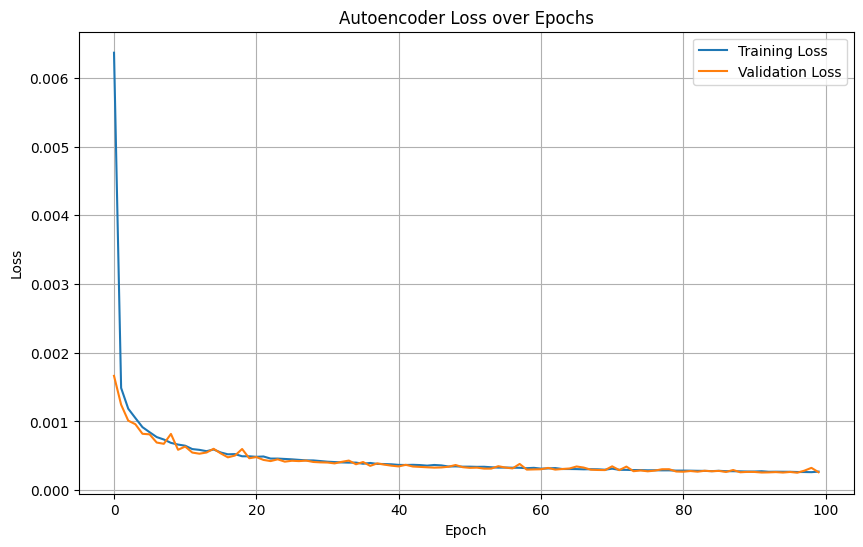

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_dir = '/content/random_images_10000'

# Desired dimensions for resizing images.
IMG_HEIGHT = 128
IMG_WIDTH = 128
CHANNELS = 3

# Function to load images from a folder.
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            try:
                # Load as grayscale
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
                    # Normalization: scale pixel values between 0 and 1
                    img = img / 255.0
                    images.append(img)
            except Exception as e:
                print(f"Error loading or processing file {filename}: {e}")
    return np.array(images)

print("Loading images...")
images = load_images_from_folder(data_dir)

# Check data shape and number of images
if len(images) == 0:
    print("No images found. Please check 'data_dir' path.")
    exit()

print(f"Number of loaded images: {len(images)}")
print(f"Shape of images: {images.shape}")

# Add a channel dimension (for Keras)
# (num_samples, height, width, channels)
images = np.expand_dims(images, axis=-1)
print(f"Shape of images after adding channel dimension: {images.shape}")

# Split data into training and validation sets.
# Autoencoders do not require labeled data; X_train and X_val both contain original images.
X_train, X_val = train_test_split(images, test_size=0.2, random_state=42)
print(f"Shape of training set: {X_train.shape}")
print(f"Shape of validation set: {X_val.shape}")


def build_encoder(input_shape):
    encoder_input = layers.Input(shape=input_shape, name='encoder_input')

    # First convolutional layer: extract initial features (edges, textures)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
    x = layers.MaxPooling2D((2, 2), padding='same')(x) # Spatial dimension reduction

    # Second convolutional layer: extract more complex features (shapes, patterns)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Third convolutional layer: extract higher-level features and further compression
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same', name='encoded_output')(x)

    # Latent space dimensions
    print(f"Latent space dimensions after encoder: {encoded.shape}")
    return models.Model(encoder_input, encoded, name='encoder')


def build_decoder(encoded_shape):
    # The decoder's input is the encoder's output (latent space).
    decoder_input = layers.Input(shape=encoded_shape[1:], name='decoder_input') # [1:] to remove batch_size dimension

    # First transposed convolutional layer: start reconstructing higher-level features
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(decoder_input)
    x = layers.UpSampling2D((2, 2))(x) # Spatial dimension increase

    # Second transposed convolutional layer: reconstruct more complex features
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    # Third transposed convolutional layer: reconstruct initial features
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    decoded = layers.Conv2D(CHANNELS, (3, 3), activation='sigmoid', padding='same', name='decoder_output')(x)


    return models.Model(decoder_input, decoded, name='decoder')

# Build encoder and decoder models
encoder_model = build_encoder(images.shape[1:])
decoder_model = build_decoder(encoder_model.output.shape)

# Combine encoder and decoder to build the full autoencoder
autoencoder_input = layers.Input(shape=images.shape[1:])
encoded_representation = encoder_model(autoencoder_input)
decoded_output = decoder_model(encoded_representation)
autoencoder = models.Model(autoencoder_input, decoded_output, name='autoencoder')


autoencoder.compile(optimizer='adam', loss='mse')

print("\nAutoencoder architecture summary:")
autoencoder.summary()

print("\nEncoder architecture summary:")
encoder_model.summary()

history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_val, X_val))


# Display Loss plot during training
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()




Encoder model summary:


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_output (MaxPooling2D)   │ (None, 16, 16, 128)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,672 (362.00 KB)

 Trainable params: 92,672 (362.00 KB)

 Non-trainable params: 0 (0.00 B)


Extracting features from layer: conv2d
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Shape of features extracted from layer 'conv2d': (1, 128, 128, 32)


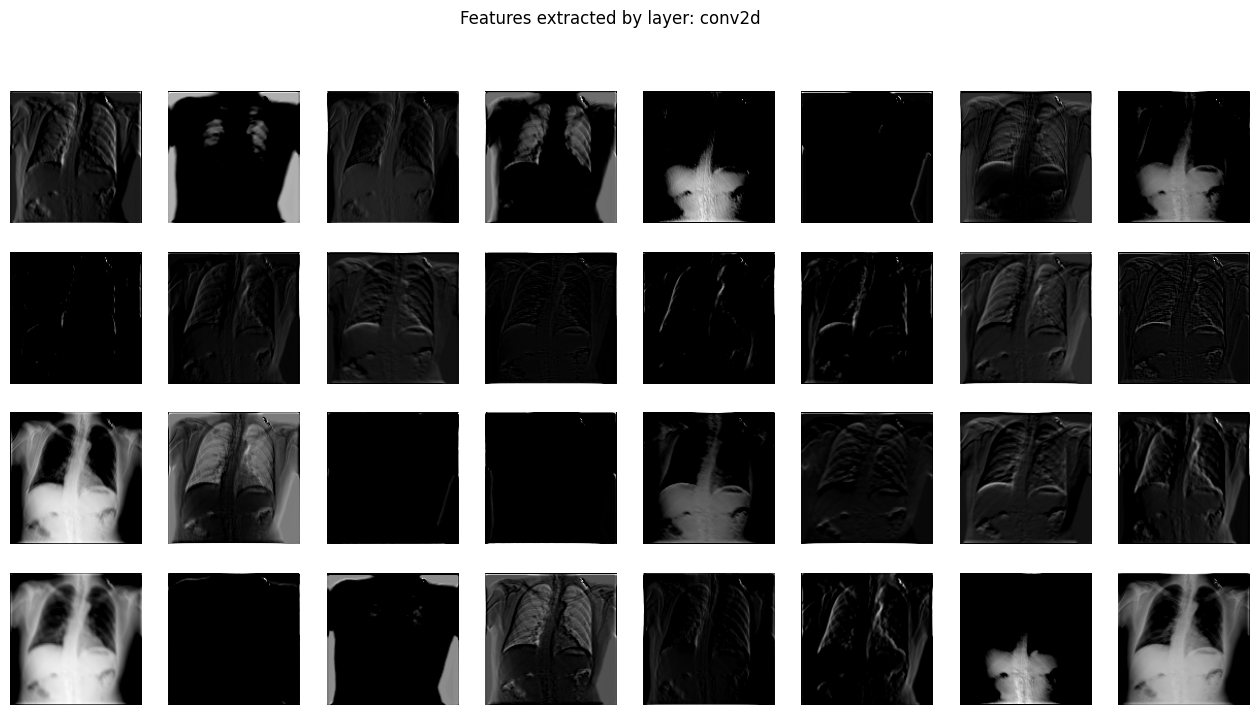


Extracting features from layer: conv2d_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
Shape of features extracted from layer 'conv2d_1': (1, 64, 64, 64)


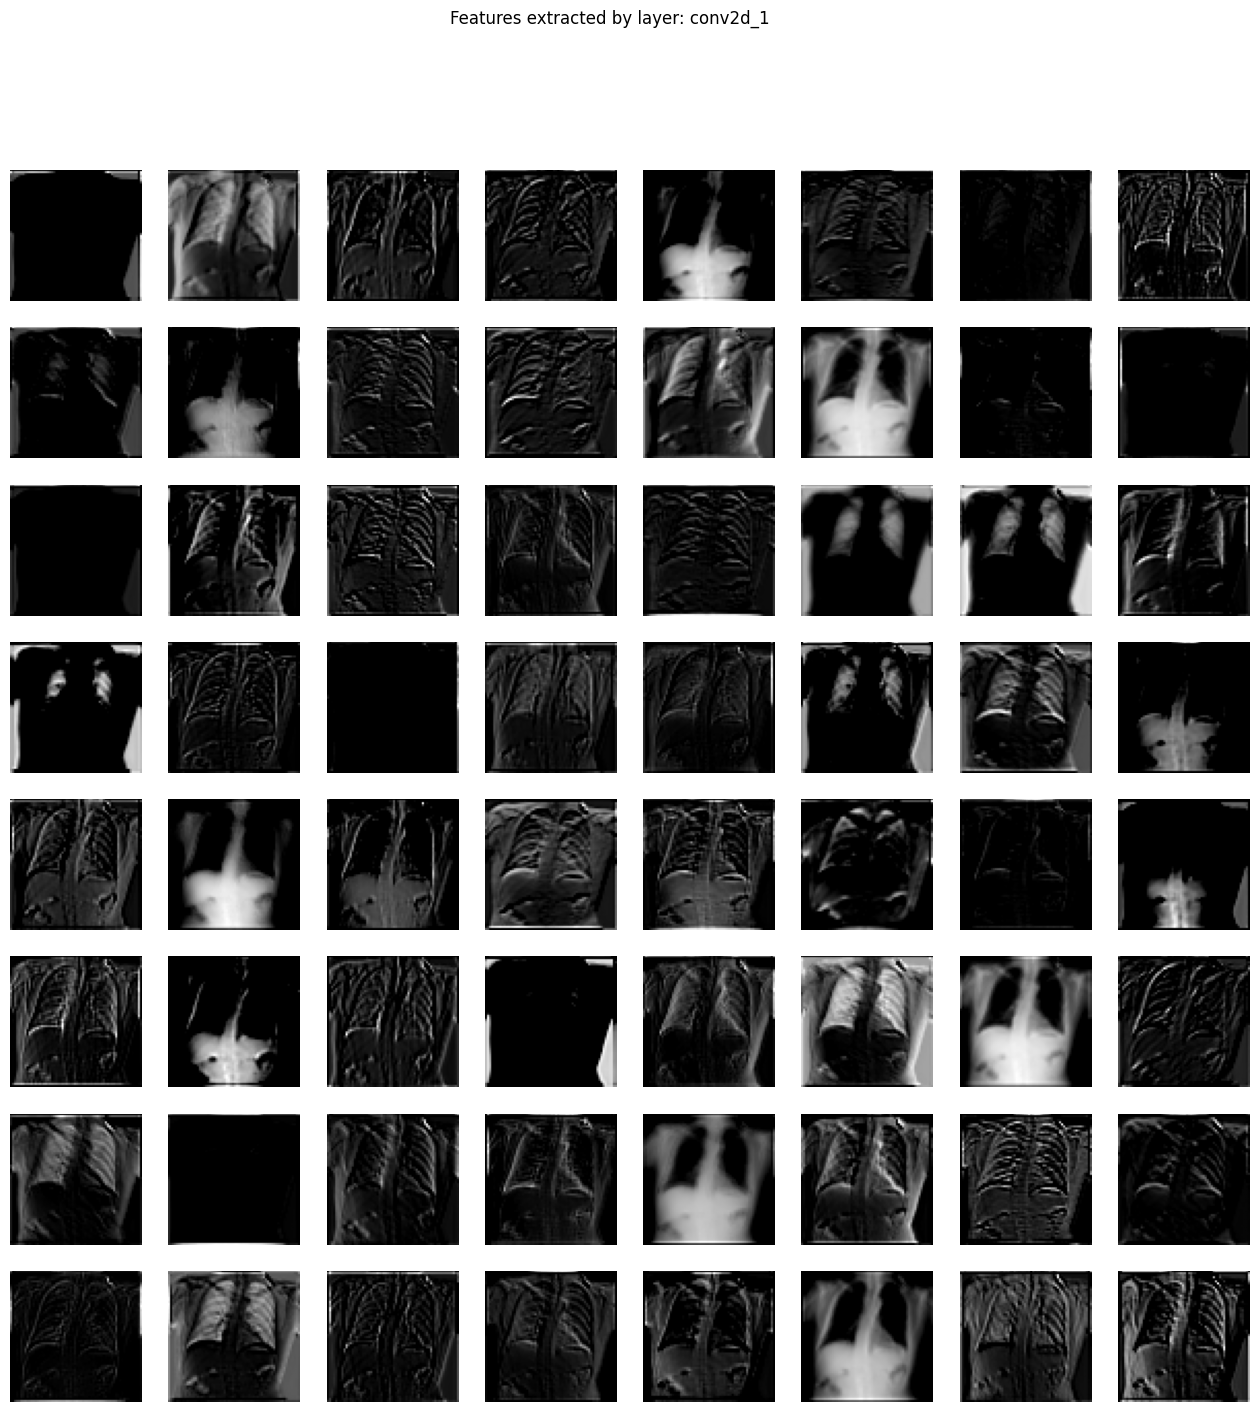


Extracting features from layer: conv2d_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
Shape of features extracted from layer 'conv2d_2': (1, 32, 32, 128)


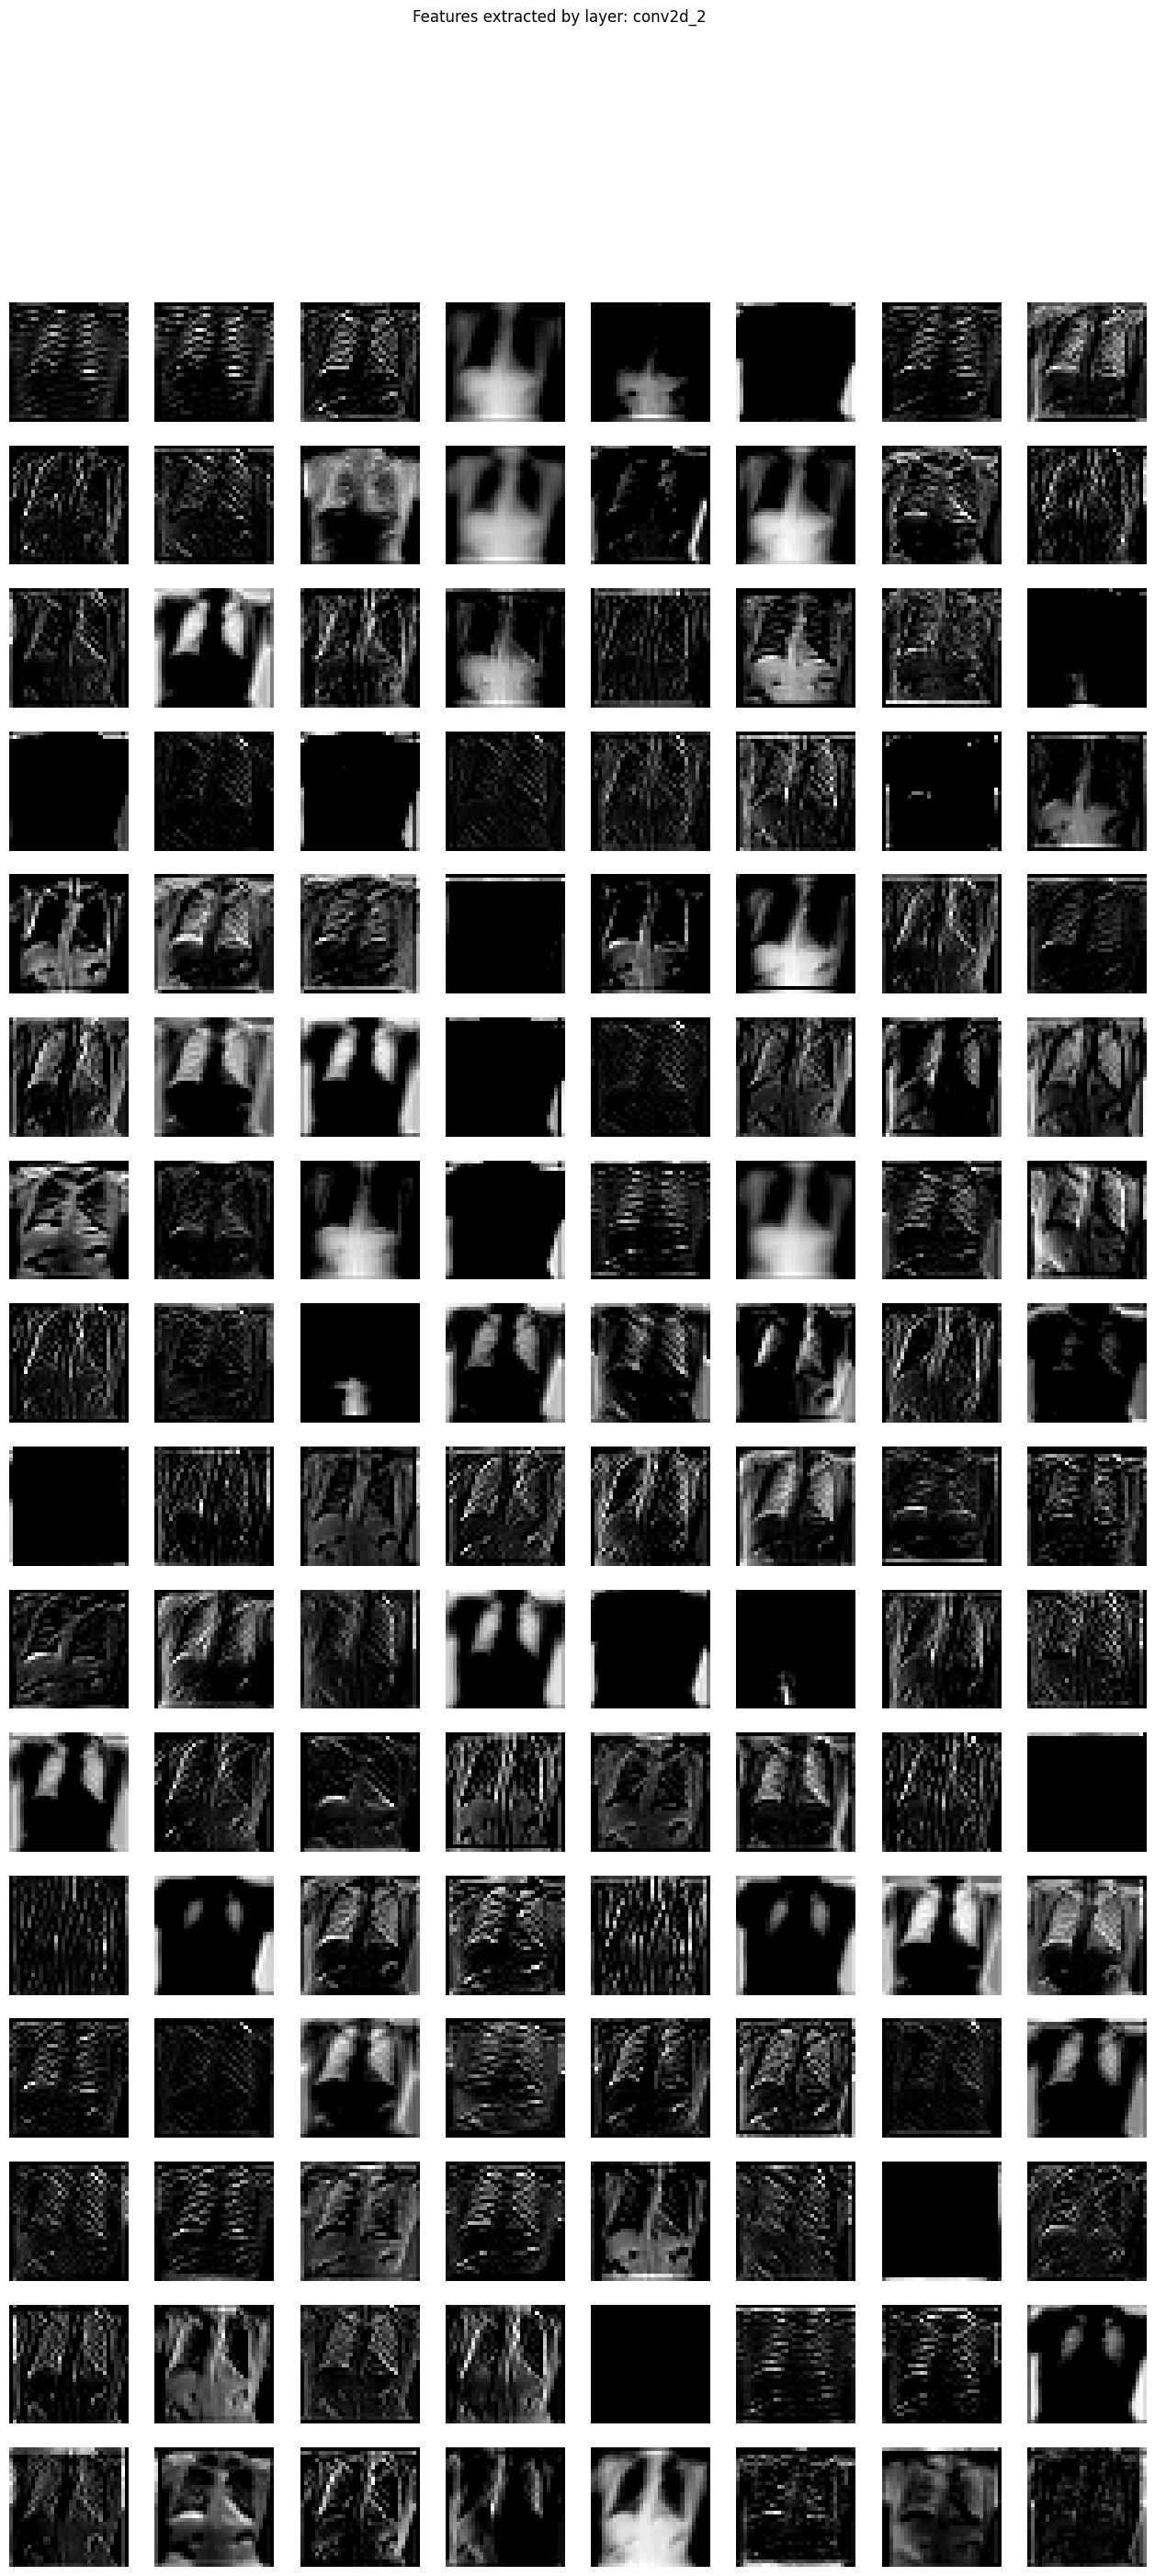

In [ ]:
import tensorflow as tf # Assuming this and other necessary imports are already present from previous code
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
# Print summary to see actual layer names
print("\nEncoder model summary:")
encoder_model.summary() # Assuming encoder_model is the trained encoder from the previous steps

# Extract features for a sample image
sample_image = X_val[0:1] # One image as input

# Iterate through each layer of the encoder and display its feature maps
for layer in encoder_model.layers:
    # We are interested in Conv2D layers for feature visualization
    if isinstance(layer, layers.Conv2D):
        layer_name = layer.name
        print(f"\nExtracting features from layer: {layer_name}")

        # Build a model to get the output of this specific layer
        try:
            feature_extractor_model = models.Model(inputs=encoder_model.input,
                                                   outputs=encoder_model.get_layer(layer_name).output)
            features_from_layer = feature_extractor_model.predict(sample_image)

            print(f"Shape of features extracted from layer '{layer_name}': {features_from_layer.shape}")

            # Visually displaying these features
            num_filters = features_from_layer.shape[-1]
            # Determine grid size for plotting
            cols = min(8, num_filters) # Max 8 columns
            rows = int(np.ceil(num_filters / cols))
            if rows == 0: # Handle case where num_filters is 0 (should not happen for Conv2D with filters > 0)
                continue

            plt.figure(figsize=(cols * 2, rows * 2))
            for i in range(num_filters):
                ax = plt.subplot(rows, cols, i + 1)
                feature_map = features_from_layer[0, :, :, i]
                # Normalize features for better visualization if they are not already in [0, 1]
                if feature_map.max() - feature_map.min() > 0:
                    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
                plt.imshow(feature_map, cmap='gray')
                plt.axis('off')
            plt.suptitle(f"Features extracted by layer: {layer_name}")
            plt.show()
        except ValueError as e:
            print(f"Error extracting features from layer '{layer_name}': {e}")
            print("This layer might not be suitable for direct output extraction or its name has changed.")

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, average_precision_score, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, ReLU, Flatten, Dense, Reshape,
    Conv2DTranspose, Dropout, concatenate
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19


In [ ]:
dataframe = pd.read_csv("/content/Data_Entry_2017.csv")

columns = ["Image"]
for i in dataframe["Finding Labels"].values:
    for j in i.split("|"):
        if j not in columns:
            columns.append(j)
labels = columns.copy()
labels.remove("Image")

#Taking the first 79100 images from the master table as the train dataset
trainset = pd.DataFrame(columns = columns)
for i in range(79100):
    col = [0]*len(columns)
    col[0] = dataframe["Image Index"][i]
    count = 1
    for j in columns[1:]:
        if(j in dataframe["Finding Labels"][i]):
            col[count] = 1
        count+=1
    trainset.loc[len(trainset)] = col

#Taking the next 16500 images from the master table as the validation dataset
valset = pd.DataFrame(columns = columns)
for i in range(79100, 95600):
    col = [0]*len(columns)
    col[0] = dataframe["Image Index"][i]
    count = 1
    for j in columns[1:]:
        if(j in dataframe["Finding Labels"][i]):
            col[count] = 1
        count+=1
    valset.loc[len(valset)] = col

#Taking the next 16500 images from the master table as the test dataset
testset = pd.DataFrame(columns = columns)
for i in range(95600, 112100):
    col = [0]*len(columns)
    col[0] = dataframe["Image Index"][i]
    count = 1
    for j in columns[1:]:
        if(j in dataframe["Finding Labels"][i]):
            col[count] = 1
        count+=1
    testset.loc[len(testset)] = col


Patient Overlap - Train and Test:  0
Patient Overlap - Test and Validation:  1
Patient Overlap - Train and Validation:  0
Patient Overlap - Train and Test:  0
Patient Overlap - Test and Validation:  1
Patient Overlap - Train and Validation:  0
Maximum Pixel Value:  0.9372549
Minimum Pixel Value:  0.0
Image dimension: 224 x 224 
Mean - Pixel Value:  0.5147347
Std Deviation Pixel Value:  0.2876515


<Axes: xlabel='Pixel Values', ylabel='Count'>

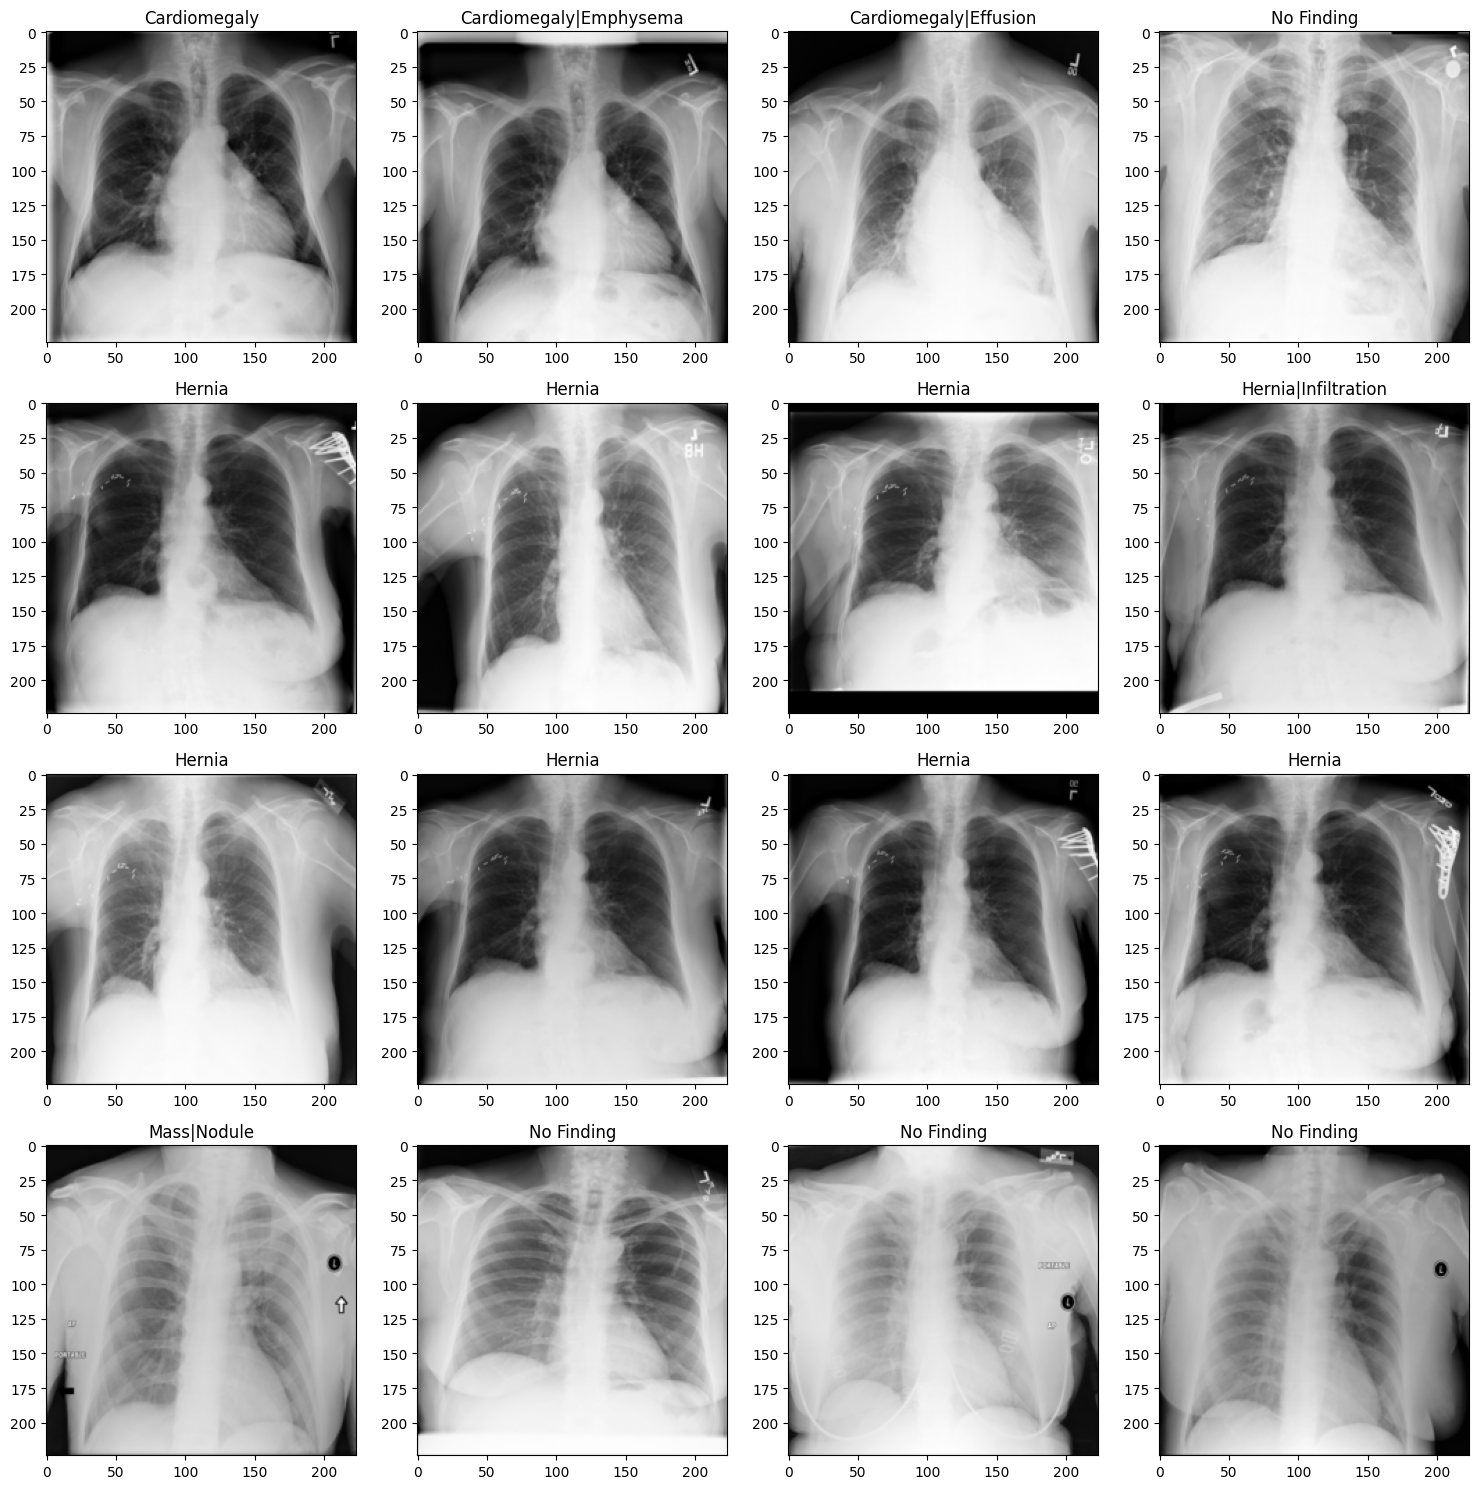

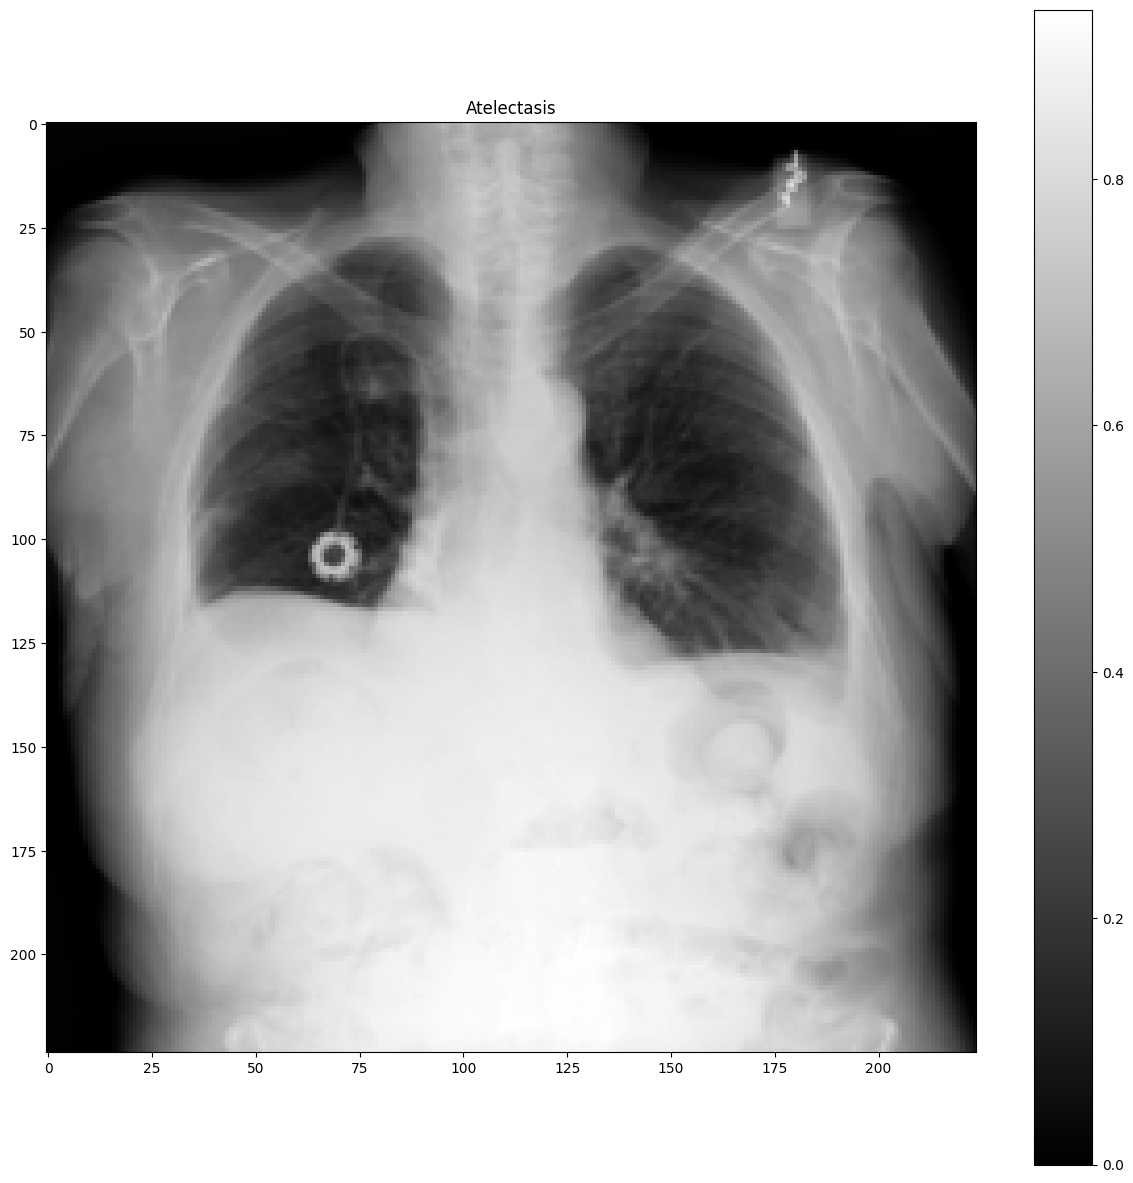

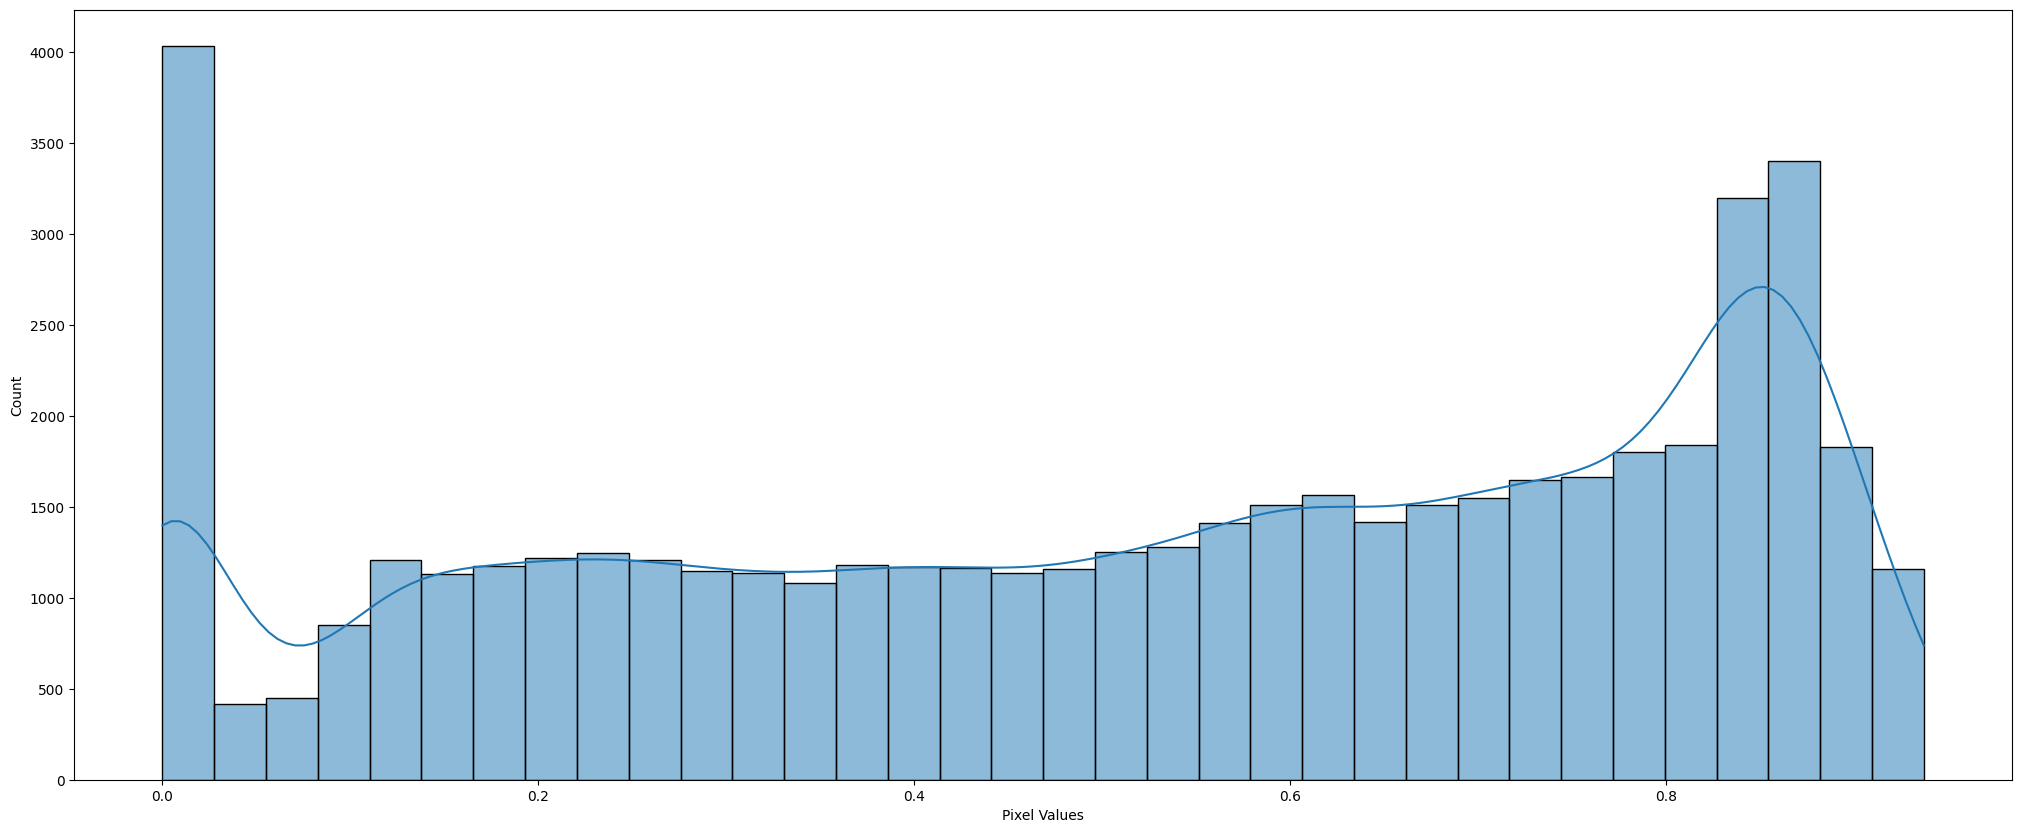

In [ ]:

#Plotting first 16 images with their disease labels
img_dir = "/content/images-224/images-224"
plt.figure(figsize = (15,15))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(plt.imread(os.path.join(img_dir, trainset["Image"][i])), cmap = "gray")
    plt.title(dataframe[dataframe["Image Index"] == trainset["Image"][i]].values[0][1])
plt.tight_layout()

#Overlabs
def isOverlap(s1, s2):
    total = set(s1).intersection(set(s2))
    return [len(total), total]

def overlapcheck(trainset, valset, testset):
    patid_train = []
    patid_val = []
    patid_test = []
    for name in trainset['Image'].values:
        patid_train.append(int(name.split("_")[0]))

    for name in valset['Image'].values:
        patid_val.append(int(name.split("_")[0]))

    for name in testset['Image'].values:
        patid_test.append(int(name.split("_")[0]))
    trte = isOverlap(patid_train, patid_test)
    teva = isOverlap(patid_test, patid_val)
    trva = isOverlap(patid_train, patid_val)
    print("Patient Overlap - Train and Test: ", trte[0])
    print("Patient Overlap - Test and Validation: ", teva[0])
    print("Patient Overlap - Train and Validation: ", trva[0])
    return trte, teva, trva

#Checking for overlaps between trainset, testset and validation set
trte, teva, trva = overlapcheck(trainset, valset, testset)

#Removing overlapping patients
for i in trva[1]:
    for name in trainset['Image'].values:
        if(int(name.split("_")[0]) == i):
            trainset.drop(trainset.loc[trainset['Image'] == name].index, inplace=True)

#Checking for overlaps after removing common patients
trte, teva, trva = overlapcheck(trainset, valset, testset)
num = np.random.randint(trainset.shape[0])
sample = plt.imread(os.path.join(img_dir,trainset.iloc[[num]]["Image"].values[0]))
plt.figure(figsize=(15, 15))
plt.title(dataframe[dataframe["Image Index"] == trainset.iloc[[num]]["Image"].values[0]].values[0][1])
plt.imshow(sample, cmap = 'gray')
plt.colorbar()
trainset.iloc[[num]]

print("Maximum Pixel Value: ", sample.max())
print("Minimum Pixel Value: ", sample.min())
print(f"Image dimension: {sample.shape[0]} x {sample.shape[1]} ")

fig, ax = plt.subplots(figsize=(25, 10))
plt.xlabel("Pixel Values")
print("Mean - Pixel Value: ", sample.mean())
print("Std Deviation Pixel Value: ", sample.std())
sns.histplot(sample.ravel(), ax = ax, kde = True)

In [ ]:

def adjust_contrast_and_saturation(image):
  # Generate a random contrast factor between 0.4 and 0.9
  contrast_factor = tf.random.uniform([], 0.4, 0.9)
  image = tf.image.adjust_contrast(image, contrast_factor)

  # Generate a random saturation factor between 0.4 and 0.9
  saturation_factor = tf.random.uniform([], 0.4, 0.9)
  image = tf.image.adjust_saturation(image, saturation_factor)

  return image

img_dir = '/content/images-224/images-224'
batch_size = 128
target_size = (128, 128)

datagen_base = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.3, 1.2],
    preprocessing_function=adjust_contrast_and_saturation

)

# first fit on a sample to compute mean/std
sample_gen = ImageDataGenerator().flow_from_dataframe(
    dataframe=trainset,
    directory=img_dir,
    x_col='Image', y_col=labels,
    batch_size=batch_size,
    class_mode=None,
    target_size=target_size,
    shuffle=True
)
sample_batch = next(sample_gen)
datagen_base.fit(sample_batch)

train_gen = datagen_base.flow_from_dataframe(
    dataframe=trainset,
    directory=img_dir,
    x_col='Image', y_col=labels,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='raw',
    shuffle=True
)
val_gen = datagen_base.flow_from_dataframe(
    dataframe=valset,
    directory=img_dir,
    x_col='Image', y_col=labels,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='raw',
    shuffle=False
)
test_gen = datagen_base.flow_from_dataframe(
    dataframe=testset,
    directory=img_dir,
    x_col='Image', y_col=labels,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='raw',
    shuffle=False
)

Found 79100 validated image filenames.
Found 79100 validated image filenames.
Found 16500 validated image filenames.
Found 16500 validated image filenames.


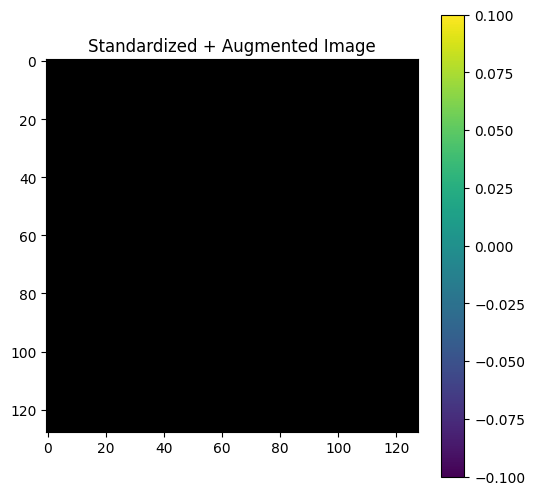

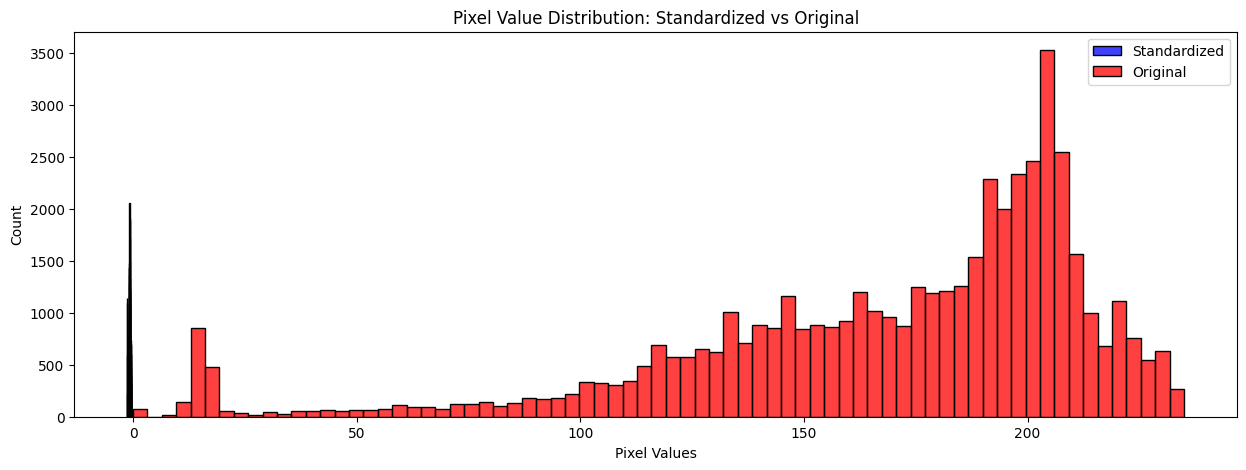

📊 Mean (Standardized Image): -0.81715775
📊 Std (Standardized Image): 0.20923536
📊 Mean (Original Sample): 168.46423
📊 Std (Original Sample): 47.79055


In [ ]:

# Taking a random image from the train generator
num = np.random.randint(len(train_gen))
images, labels = train_gen.__getitem__(num)

# Show the first image in the batch
plt.figure(figsize=(6, 6))
plt.imshow(images[0])
plt.title("Standardized + Augmented Image")
plt.colorbar()
plt.show()

# For comparison: take a raw image before augmentation
raw_sample = sample_batch[0]

# Plot histogram of pixel intensities
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(images[0].ravel(), ax=ax, kde=False, color='blue', label='Standardized')
sns.histplot(raw_sample.ravel(), ax=ax, kde=False, color='red', label='Original')
ax.set_xlabel("Pixel Values")
ax.set_title("Pixel Value Distribution: Standardized vs Original")
plt.legend()
plt.show()

# Print mean/std for diagnostic
print("📊 Mean (Standardized Image):", images[0].mean())
print("📊 Std (Standardized Image):", images[0].std())
print("📊 Mean (Original Sample):", raw_sample.mean())
print("📊 Std (Original Sample):", raw_sample.std())


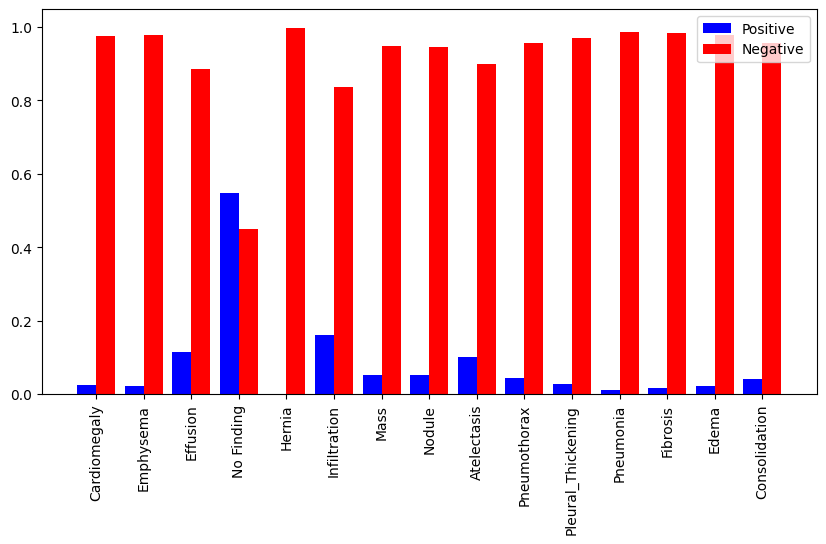

<Figure size 2000x1500 with 0 Axes>

In [ ]:
# Calculate positive and negative frequencies for each label
disease_labels = trainset.columns[1:]

positive_freqs = trainset[disease_labels].sum().values / len(trainset)
negative_freqs = 1 - positive_freqs

data = {
    'Class': disease_labels,
    'Positive': positive_freqs,
    'Negative': negative_freqs
}

X_axis = np.arange(len(disease_labels))
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(X_axis-0.2, data['Positive'], width=0.4, color='b', label = "Positive")
ax.bar(X_axis+0.2, data['Negative'], width=0.4, color='r', label = 'Negative')
plt.xticks(X_axis, disease_labels, rotation = 90) # Use the corrected variable name
plt.legend()
plt.figure(figsize=(20,15))
plt.show()

def weighted_cross_entropy(y_true, y_pred):
    # Calculate positive and negative weights based on class frequencies in dataset.
    # Ensure positive_freqs and negative_freqs are based on the full dataset frequencies, not a batch
    positive_weights = tf.constant(positive_freqs, dtype=tf.float32)
    negative_weights = tf.constant(negative_freqs, dtype=tf.float32)

    # Calculate the weighted loss
    loss = -(y_true * tf.math.log(y_pred + 1e-7) * positive_weights + (1 - y_true) * tf.math.log(1 - y_pred + 1e-7) * negative_weights)

    return tf.reduce_mean(loss)

In [ ]:
encoder_model.save('encoder_model.keras') # This saves the encoder
print("Encoder model saved as encoder_model.keras")

Encoder model saved as encoder_model.keras


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, concatenate, Lambda, Conv2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam
# Assuming weighted_cross_entropy, train_gen, val_gen, ModelCheckpoint, etc. are defined elsewhere

# Define target_size if not already defined (e.g., from your autoencoder)
IMG_HEIGHT = 128
IMG_WIDTH = 128
target_size = (IMG_HEIGHT, IMG_WIDTH)

# Load pretrained encoder (ensure 'encoder_model.keras' path is correct)
# It's good practice to load it within the script where it's used,
# or ensure it's loaded correctly before this model definition.
try:
    encoder = load_model('encoder_model.keras', compile=False)
    print("Encoder loaded successfully.")
except Exception as e:
    print(f"Error loading encoder_model.keras: {e}")
    # Handle error, maybe exit or use a placeholder
    raise

# Build the dual‐branch classifier
inp = Input(shape=(*target_size, 3), name='input_image')

# --- Encoder branch ---
# Adapt the 3-channel input 'inp' for the 1-channel pre-trained encoder
# We'll use a Lambda layer to average the RGB channels to create a grayscale image
encoder_input_adapted = Lambda(
    lambda x: tf.reduce_mean(x, axis=-1, keepdims=True),
    name='rgb_to_gray_for_encoder'
)(inp)

# Pass the adapted input to the loaded encoder
# The output 'enc_feat_tensor' will be the latent space representation (e.g., (None, 16, 16, 128))
enc_feat_tensor = encoder(encoder_input_adapted)

# Flatten the encoder's output features
enc_flat = Flatten(name='encoder_flatten')(enc_feat_tensor)

# Freeze the encoder layers (as you're doing)
for layer in encoder.layers:
    layer.trainable = False

# --- VGG19 branch ---
vgg_base = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(*target_size, 3) # VGG19 takes the original 3-channel input
)
# Freeze VGG19 layers (as you're doing)
for layer in vgg_base.layers:
    layer.trainable = False

vgg_feat = vgg_base(inp) # VGG uses the original 3-channel input 'inp'
vgg_flat = Flatten(name='vgg_flatten')(vgg_feat)

# --- Merge features ---
# Now concatenate the flattened features from both branches
merged = concatenate([enc_flat, vgg_flat], name='concat_features')

# --- Classification head ---
x = Dense(1024, activation='relu', name='head_dense1')(merged)
x = Dropout(0.5, name='head_dropout1')(x)
x = Dense(512, activation='relu', name='head_dense2')(x)
x = Dropout(0.5, name='head_dropout2')(x)
out = Dense(15, activation='sigmoid', name='classifier_output')(x) # Assuming 15 classes

classifier = Model(inputs=inp, outputs=out, name='xray_classifier')

classifier.summary()


Encoder loaded successfully.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "xray_classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rgb_to_gray_for_en… │ (None, 128, 128,  │          0 │ input_image[0][0] │
│ (Lambda)            │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ (None, 16, 16,    │     92,672 │ rgb_to_gray_for_… │
│ (Functional)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg19 (Functional)  │ (None, 4, 4, 512) │ 20,024,384 │ input_image[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_flatten     │ (None, 32768)     │          0 │ encoder[0][0]     │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg_flatten         │ (None, 8192)      │          0 │ vgg19[0][0]       │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_features     │ (None, 40960)     │          0 │ encoder_flatten[… │
│ (Concatenate)       │                   │            │ vgg_flatten[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ head_dense1 (Dense) │ (None, 1024)      │ 41,944,064 │ concat_features[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ head_dropout1       │ (None, 1024)      │          0 │ head_dense1[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ head_dense2 (Dense) │ (None, 512)       │    524,800 │ head_dropout1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ head_dropout2       │ (None, 512)       │          0 │ head_dense2[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classifier_output   │ (None, 15)        │      7,695 │ head_dropout2[0]… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 62,593,615 (238.78 MB)

 Trainable params: 42,476,559 (162.04 MB)

 Non-trainable params: 20,117,056 (76.74 MB)

In [ ]:
# Compile for Stage 1: train only head
classifier.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=weighted_cross_entropy,
    metrics=['accuracy']
)
# Callbacks Stage 1
ckpt1 = ModelCheckpoint(
    'best_clf_stage1.keras', monitor='val_loss',
    save_best_only=True, verbose=1
)
rlr1 = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1
)
es1 = EarlyStopping(
    monitor='val_loss', patience=5,
    restore_best_weights=True, verbose=1
)

print("=== Stage 1: Training classification head ===")
history1 = classifier.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[ckpt1, rlr1, es1]
)

# Stage 2: Fine‐tune last encoder/VGG layers
# Unfreeze last block of encoder and last conv block of VGG
for layer in encoder.layers:
    if layer.name.startswith('conv2d_2') or layer.name.startswith('batch_normalization_2'):
        layer.trainable = True

for layer in vgg_base.layers:
    if layer.name.startswith('block5_'):
        layer.trainable = True

# Recompile with lower LR
classifier.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=weighted_cross_entropy,
    metrics=['accuracy']
)
classifier.summary()

# Callbacks Stage 2
ckpt2 = ModelCheckpoint(
    'best_clf_stage2.keras', monitor='val_loss',
    save_best_only=True, verbose=1
)
rlr2 = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1
)
es2 = EarlyStopping(
    monitor='val_loss', patience=10,
    restore_best_weights=True, verbose=1
)

print("=== Stage 2: Fine-tuning encoder & VGG ===")
history2 = classifier.fit(
    train_gen,
    epochs=30,
    validation_data=val_gen,
    callbacks=[ckpt2, rlr2, es2]
)

#Load best fine‐tuned weights for evaluation/prediction
classifier.load_weights('best_clf_stage2.keras')
print("Best model loaded. Ready for evaluation or prediction.")

=== Stage 1: Training classification head ===


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
162/618 ━━━━━━━━━━━━━━━━━━━━ 12:31 2s/step - accuracy: 0.5194 - loss: 0.2905

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score,
                             matthews_corrcoef, average_precision_score, confusion_matrix,
                             roc_curve, roc_auc_score, precision_recall_curve)

weighted_precision_list = []
weighted_recall_list = []
weighted_f1_list = []
accuracy_list = []
mcc_list = []
auc_pr_list = []
best_thresholds = []

predicted_vals = classifier.predict(test_gen)
all_gt = np.array(test_gen.labels)
all_pred_probs = predicted_vals

columns = ["Image"]
for i in dataframe["Finding Labels"].values:
    for j in i.split("|"):
        if j not in columns:
            columns.append(j)
labels = columns.copy()
labels.remove("Image")

rows = []

for i in range(all_gt.shape[1]):
    try:
        gt = all_gt[:, i]
        pred_probs = all_pred_probs[:, i]

        best_f1 = -1
        best_thresh = 0
        for thresh in np.arange(0.0001, 0.0999999, 0.0001):
            pred = (pred_probs > thresh).astype(int)
            f1 = f1_score(gt, pred, average="weighted")
            if f1 > best_f1:
                best_f1 = f1
                best_thresh = thresh

        pred = (pred_probs > best_thresh).astype(int)

        weighted_precision = precision_score(gt, pred, average="weighted")
        weighted_recall = recall_score(gt, pred, average="weighted")
        weighted_f1 = f1_score(gt, pred, average="weighted")
        accuracy = accuracy_score(gt, pred)
        mcc = matthews_corrcoef(gt, pred)
        auc_pr = average_precision_score(gt, pred_probs)

        print(f"\nMetrics for {labels[i]} (Best Threshold: {best_thresh:.4f}):")
        print(f"  Weighted Precision: {weighted_precision:.4f}")
        print(f"  Weighted Recall: {weighted_recall:.4f}")
        print(f"  Weighted F1-Score: {weighted_f1:.4f}")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  MCC: {mcc:.4f}")
        print(f"  AUC-PR: {auc_pr:.4f}")

        cm = confusion_matrix(gt, pred)
        print(f"  Confusion Matrix:")
        print(cm)

        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            print(f"  Specificity: {specificity:.4f}")

        weighted_precision_list.append(weighted_precision)
        weighted_recall_list.append(weighted_recall)
        weighted_f1_list.append(weighted_f1)
        accuracy_list.append(accuracy)
        mcc_list.append(mcc)
        auc_pr_list.append(auc_pr)
        best_thresholds.append(best_thresh)

        rows.append({
            "Label": labels[i],
            "Best Threshold": best_thresh,
            "Weighted Precision": weighted_precision,
            "Weighted Recall": weighted_recall,
            "Weighted F1-Score": weighted_f1,
            "Accuracy": accuracy,
            "MCC": mcc,
            "AUC-PR": auc_pr
        })

    except ValueError:
        pass

metrics_df = pd.DataFrame(rows)
print("\nSummary Table:")
print(metrics_df)

print("\nOverall Weighted Metrics:")
print(f"Mean Weighted Precision: {np.mean(weighted_precision_list):.4f}")
print(f"Mean Weighted Recall: {np.mean(weighted_recall_list):.4f}")
print(f"Mean Weighted F1-Score: {np.mean(weighted_f1_list):.4f}")
print(f"Mean Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Mean MCC: {np.mean(mcc_list):.4f}")
print(f"Mean AUC-PR: {np.mean(auc_pr_list):.4f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for i in range(len(labels)):
    try:
        gt = all_gt[:, i]
        pred = all_pred_probs[:, i]
        fpr, tpr, thresholds = roc_curve(gt, pred)

        youden_j = tpr - fpr
        optimal_idx = np.argmax(youden_j)
        optimal_threshold = thresholds[optimal_idx]

        roc_auc = roc_auc_score(gt, pred)
        plt.plot(fpr, tpr, label=f"{labels[i]} (AUC = {roc_auc:.2f}, Optimal Threshold = {optimal_threshold:.2f})")
    except ValueError:
        pass
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
for i in range(len(labels)):
    try:
        gt = all_gt[:, i]
        pred = all_pred_probs[:, i]
        precision, recall, _ = precision_recall_curve(gt, pred)
        average_precision = average_precision_score(gt, pred)
        plt.plot(recall, precision, label=f"{labels[i]} (AP = {average_precision:.2f})")
    except ValueError:
        pass
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score,
                             matthews_corrcoef, average_precision_score, confusion_matrix,
                             roc_curve, roc_auc_score, precision_recall_curve)

precision_list = []
recall_list = []
f1_list = []
accuracy_list = []
mcc_list = []
auc_pr_list = []
best_thresholds = []

predicted_vals = classifier.predict(test_gen)
all_gt = np.array(test_gen.labels)
all_pred_probs = predicted_vals

columns = ["Image"]
for i in dataframe["Finding Labels"].values:
    for j in i.split("|"):
        if j not in columns:
            columns.append(j)
labels = columns.copy()
labels.remove("Image")

rows = []

for i in range(all_gt.shape[1]):
    try:
        gt = all_gt[:, i]
        pred_probs = all_pred_probs[:, i]

        best_f1 = -1
        best_thresh = 0
        for thresh in np.arange(0.0001, 0.0999999, 0.0001):
            pred = (pred_probs > thresh).astype(int)
            f1 = f1_score(gt, pred)
            if f1 > best_f1:
                best_f1 = f1
                best_thresh = thresh

        pred = (pred_probs > best_thresh).astype(int)

        precision = precision_score(gt, pred)
        recall = recall_score(gt, pred)
        f1 = f1_score(gt, pred)
        accuracy = accuracy_score(gt, pred)
        mcc = matthews_corrcoef(gt, pred)
        auc_pr = average_precision_score(gt, pred_probs)

        print(f"\nMetrics for {labels[i]} (Best Threshold: {best_thresh:.4f}):")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  MCC: {mcc:.4f}")
        print(f"  AUC-PR: {auc_pr:.4f}")

        cm = confusion_matrix(gt, pred)
        print(f"  Confusion Matrix:")
        print(cm)

        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            print(f"  Specificity: {specificity:.4f}")

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        accuracy_list.append(accuracy)
        mcc_list.append(mcc)
        auc_pr_list.append(auc_pr)
        best_thresholds.append(best_thresh)

        rows.append({
            "Label": labels[i],
            "Best Threshold": best_thresh,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Accuracy": accuracy,
            "MCC": mcc,
            "AUC-PR": auc_pr
        })

    except ValueError:
        pass

metrics_df = pd.DataFrame(rows)
print("\nSummary Table:")
print(metrics_df)

print("\nOverall Metrics:")
print(f"Mean Precision: {np.mean(precision_list):.4f}")
print(f"Mean Recall: {np.mean(recall_list):.4f}")
print(f"Mean F1-Score: {np.mean(f1_list):.4f}")
print(f"Mean Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Mean MCC: {np.mean(mcc_list):.4f}")
print(f"Mean AUC-PR: {np.mean(auc_pr_list):.4f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for i in range(len(labels)):
    try:
        gt = all_gt[:, i]
        pred = all_pred_probs[:, i]
        fpr, tpr, thresholds = roc_curve(gt, pred)

        youden_j = tpr - fpr
        optimal_idx = np.argmax(youden_j)
        optimal_threshold = thresholds[optimal_idx]

        roc_auc = roc_auc_score(gt, pred)
        plt.plot(fpr, tpr, label=f"{labels[i]} (AUC = {roc_auc:.2f}, Optimal Threshold = {optimal_threshold:.2f})")
    except ValueError:
        pass
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
for i in range(len(labels)):
    try:
        gt = all_gt[:, i]
        pred = all_pred_probs[:, i]
        precision, recall, _ = precision_recall_curve(gt, pred)
        average_precision = average_precision_score(gt, pred)
        plt.plot(recall, precision, label=f"{labels[i]} (AP = {average_precision:.2f})")
    except ValueError:
        pass
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()
